### Тестироваие нормализации

In [1]:
%config Completer.use_jedi = False

In [2]:
import pandas as pd
from tqdm.notebook import tqdm
import re
from typing import List
import os
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
import numpy as np

In [3]:
def load_docs(source_dir: str) -> List[List[str]]:
    docs = []
    for doc_name in os.listdir(source_dir):
        if os.path.isdir(doc_name):
            continue
        with open(f'{source_dir}/{doc_name}') as fh:
            doc = fh.readlines()
            docs.append(doc)
    return docs

In [4]:
docs = load_docs('clean_txt')

In [5]:
docs_tokenized = [sent.split() for doc in docs for sent in doc]

In [6]:
max_len = max([len(sent) for doc in docs for sent in doc])
max_len

1136

In [7]:
# def normalize_vectors(model):
#     vector_norms = np.linalg.norm(model.wv.vectors, axis=1)
#     vectors = model.wv.vectors / vector_norms.reshape(-1, 1)
#     return vectors

In [8]:
from sklearn.metrics.pairwise import cosine_similarity

def show_similarity_for_single_word(model, word):
    matrix = cosine_similarity(model.wv[word].reshape(1, -1), model.wv.vectors)
    plt.hist(matrix.squeeze(0), bins='rice', edgecolor='k')
    plt.title(f'Распределение схожести для слова {word}')

### Модель 0

In [9]:
%%time

model_w2v_0 = Word2Vec(
    vector_size=100,
    window=5, 
    min_count=2,
    sg=0,  # CBOW
    workers=1,
    seed=42
)

model_w2v_0.epochs = 10

model_w2v_0.build_vocab(docs_tokenized)

model_w2v_0.train(docs_tokenized,
                total_examples=model_w2v_0.corpus_count,
                epochs=model_w2v_0.epochs)

CPU times: user 3.56 s, sys: 8.63 ms, total: 3.57 s
Wall time: 3.54 s


(2593676, 2803990)

### use this instead

### DESTRUCTIVE NORMALIZATION
#model_tune.wv.unit_normalize_all()

In [10]:
## сохраняет л2 нормы векторов (при этом сами векторы ненормализованные)
# model_w2v_0.wv.fill_norms(force=False)
# model_w2v_0.wv.norms

In [11]:
model_w2v_0.wv.vectors

array([[-0.46537304,  1.6411258 , -0.4501328 , ...,  0.713052  ,
        -0.05369942, -1.4957473 ],
       [-0.04479371,  0.6334832 ,  0.09048028, ..., -0.2828738 ,
        -0.33726463,  0.62605137],
       [ 0.7409735 ,  1.6443568 , -0.7840892 , ..., -0.8982663 ,
        -0.44181132,  0.44436353],
       ...,
       [ 0.02909738, -0.05350833, -0.03794733, ...,  0.01466568,
        -0.0193783 ,  0.02366561],
       [ 0.01949738, -0.06293519, -0.01180959, ...,  0.00245689,
        -0.0392247 , -0.04558348],
       [ 0.02220099, -0.06638183, -0.05331264, ..., -0.00574383,
        -0.02967591, -0.00672227]], dtype=float32)

In [12]:
model_w2v_0.wv.vectors = model_w2v_0.wv.get_normed_vectors()

In [13]:
model_w2v_0.wv.norms

array([7.7845325 , 7.217433  , 8.461568  , ..., 0.44577688, 0.33450106,
       0.40845203], dtype=float32)

In [14]:
model_w2v_0.wv.norms = np.linalg.norm(model_w2v_0.wv.vectors, axis=1)

In [15]:
np.linalg.norm(model_w2v_0.wv.vectors, axis=1)

array([1.       , 1.       , 1.0000001, ..., 1.       , 1.       ,
       1.       ], dtype=float32)

In [16]:
# model_w2v_0.wv.vectors = normalize_vectors(model_w2v_0)
# print(model_w2v_0.wv['word'].reshape(1, -1).sum())
# print(model_w2v_0.wv['word'][:10])

In [17]:
model_w2v_0.wv.most_similar('varicose')

[('dopaminergic', 0.8862311840057373),
 ('saphenous', 0.8847015500068665),
 ('vein', 0.865838885307312),
 ('phlebitis', 0.8653373122215271),
 ('urticaria', 0.8577818274497986),
 ('placement', 0.856633186340332),
 ('tympanostomy', 0.851760745048523),
 ('probiotic', 0.8497270941734314),
 ('remedy', 0.8480321764945984),
 ('indwelling', 0.8415325880050659)]

In [18]:
model_w2v_0.wv.most_similar('cardiology')

[('conference', 0.861559271812439),
 ('discus', 0.8513166904449463),
 ('psychiatry', 0.8497380018234253),
 ('wisconsin', 0.8486155867576599),
 ('key', 0.8473687171936035),
 ('sport', 0.846464216709137),
 ('academy', 0.8452419638633728),
 ('naepp', 0.8429384231567383),
 ('force', 0.8389192223548889),
 ('pulmonology', 0.8384740352630615)]

In [ ]:
model_w2v_0.wv.most_similar('blood')

In [ ]:
model_w2v_0.wv.most_similar('doctor')

In [ ]:
model_w2v_0.wv.most_similar('treatment')

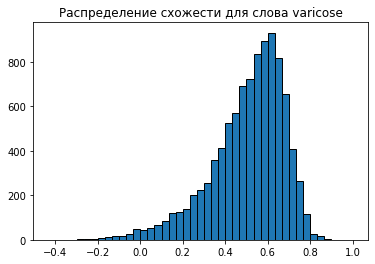

In [19]:
show_similarity_for_single_word(model_w2v_0, 'varicose')

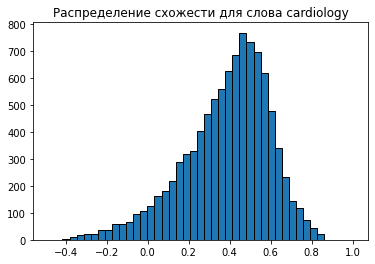

In [20]:
show_similarity_for_single_word(model_w2v_0, 'cardiology')

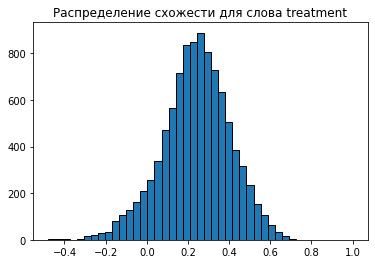

In [21]:
show_similarity_for_single_word(model_w2v_0, 'treatment')